In [1]:
import pandas
import optuna

In [2]:
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_contour,
    plot_slice,
    plot_parallel_coordinate,
    plot_intermediate_values,
    plot_edf,
    plot_timeline
)

In [3]:
study = optuna.load_study(
    study_name="pool_HPC", 
    storage="sqlite:///../results/hpt/pool_HPC.db"
)

In [8]:
df = study.trials_dataframe()

In [10]:
df.head(50)

,number,value,datetime_start,datetime_complete,duration,params_activation_mlp,params_dropout_mlp,params_hidden_size_mlp,params_lr,params_optim,params_scheduler,state
0,0,0.108496,2025-05-30 23:37:35.771407,2025-05-31 02:45:36.942838,0 days 03:08:01.171431,tanh,0.3,512-256-128,0.00033,adam,warmup,COMPLETE
1,1,0.141480,2025-05-31 00:20:32.714533,2025-05-31 03:27:17.898365,0 days 03:06:45.183832,relu,0.3,128,0.00033,SGD,warmup_decay_cos,COMPLETE
2,2,0.148416,2025-05-31 02:45:37.099479,2025-05-31 05:55:16.673987,0 days 03:09:39.574508,relu,0.3,128-64-32,0.00033,SGD,warmup_decay_cos,COMPLETE
3,3,0.102258,2025-05-31 03:27:18.016384,2025-05-31 06:35:47.604244,0 days 03:08:29.587860,tanh,0.0,128-64-32,0.00100,adamw,none,COMPLETE
4,4,0.158890,2025-05-31 05:55:16.855220,2025-05-31 09:06:31.171085,0 days 03:11:14.315865,tanh,0.1,512-256-128,0.00010,SGD,warmup,COMPLETE
5,5,0.109814,2025-05-31 06:35:47.758828,2025-05-31 09:46:53.819517,0 days 03:11:06.060689,relu,0.3,512-256-128,0.00100,adamw,none,COMPLETE
6,6,0.121989,2025-05-31 09:06:31.328732,2025-05-31 12:18:32.831722,0 days 03:12:01.502990,relu,0.1,512-256-128,0.00100,SGD,none,COMPLETE
7,7,0.174366,2025-05-31 09:46:53.948706,2025-05-31 12:57:49.112277,0 days 03:10:55.163571,relu,0.1,128-64-32,0.00010,SGD,warmup,COMPLETE
8,8,0.103674,2025-05-31 12:18:33.000900,2025-05-31 15:31:19.876621,0 days 03:12:46.875721,tanh,0.0,128-64-32,0.00033,adamw,none,COMPLETE
9,9,0.105615,2025-05-31 12:57:49.239518,2025-05-31 16:08:52.690252,0 days 03:11:03.450734,tanh,0.0,512-256-128,0.00033,adamw,none,COMPLETE


In [5]:
best_params = study.best_params
print("Best parameters:", best_params)

print("Best value:", study.best_value)
print("Best trial number:", study.best_trial.number)

Best parameters: {'lr': 0.001, 'optim': 'adamw', 'scheduler': 'none', 'dropout_mlp': 0, 'hidden_size_mlp': '128-64-32', 'activation_mlp': 'tanh'}
Best value: 0.10225827991962433
Best trial number: 3


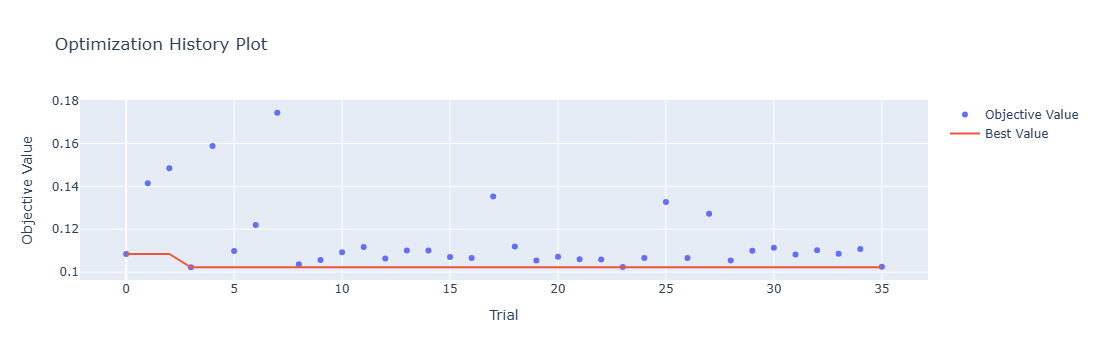

In [4]:
fig = plot_optimization_history(study)
fig.show()

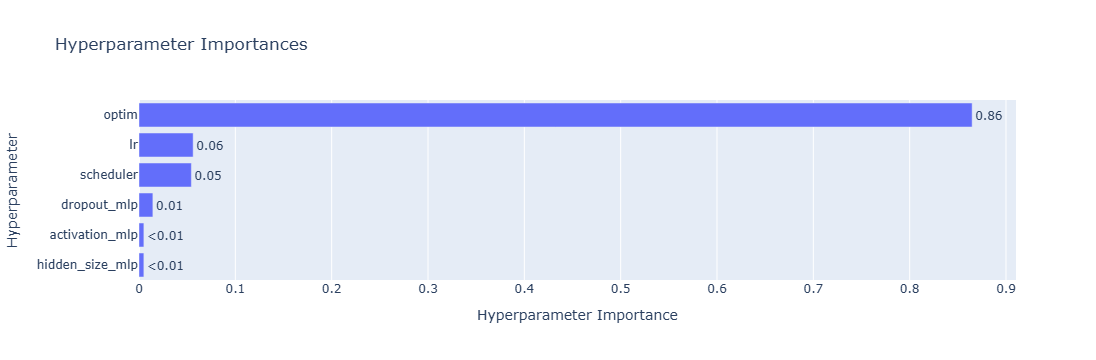

In [5]:
fig = plot_param_importances(study)
fig.show()

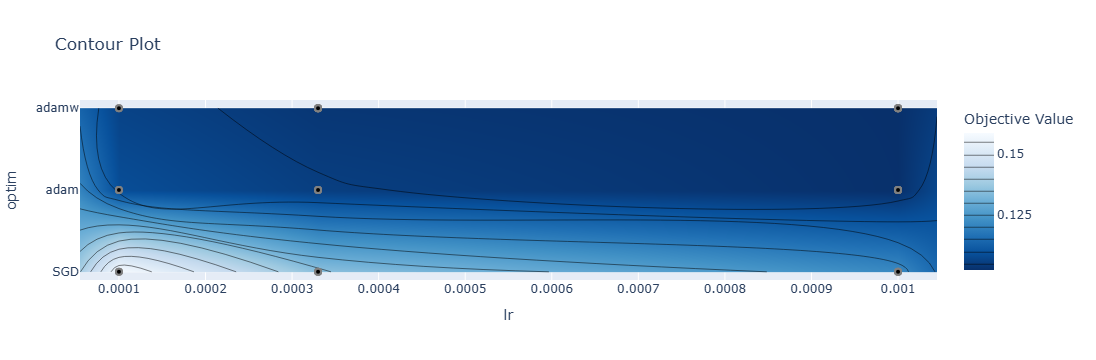

In [6]:
fig = plot_contour(study, params=['optim', 'lr'])
fig.show()

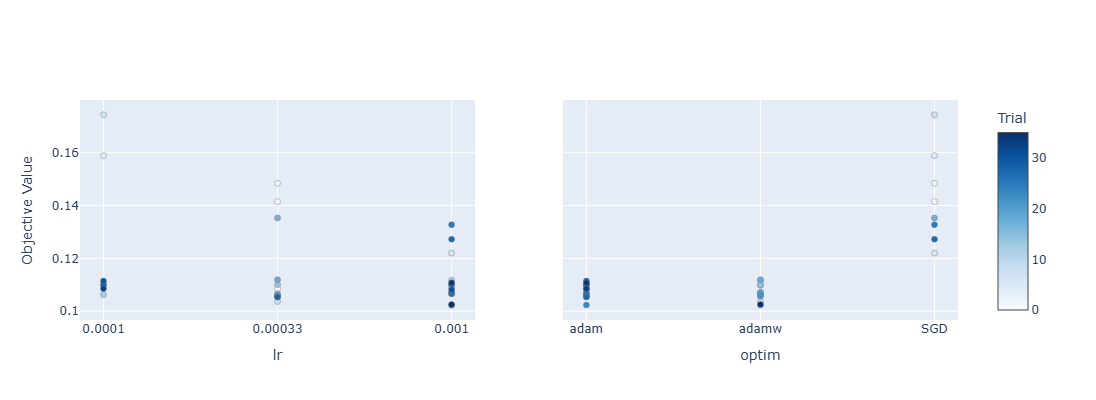

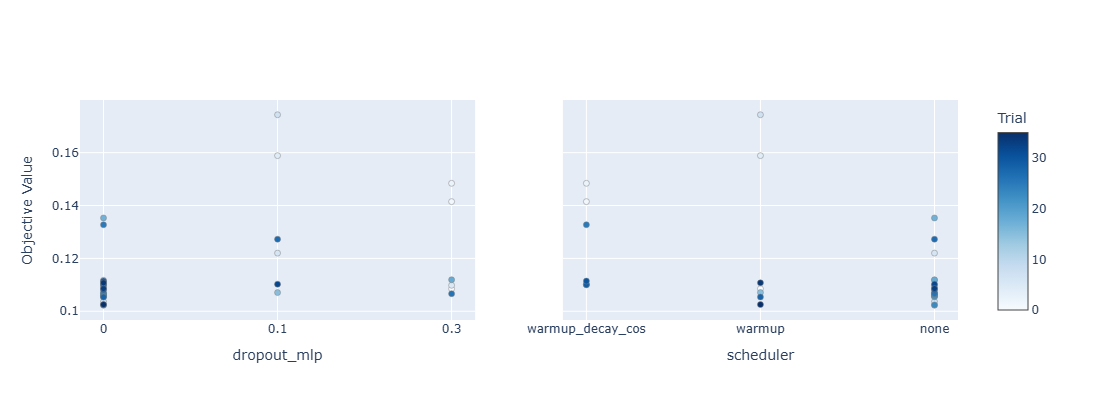

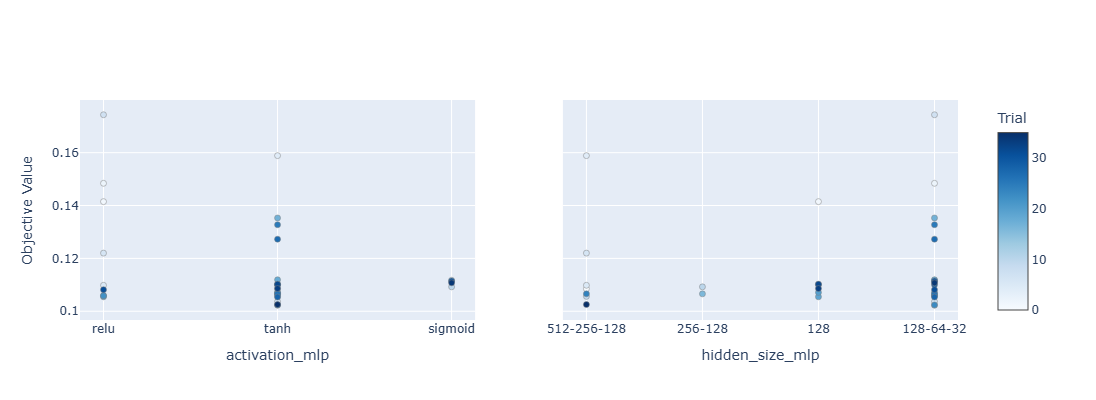

In [7]:
import optuna

param_names = list(study.best_params.keys())

for i in range(0, len(param_names), 2):
    param_chunk = param_names[i:i+2]
    fig = optuna.visualization.plot_slice(study, params=param_chunk)
    fig.update_layout(
        title='',
        width=800,
        height=400
    )
    fig.show()

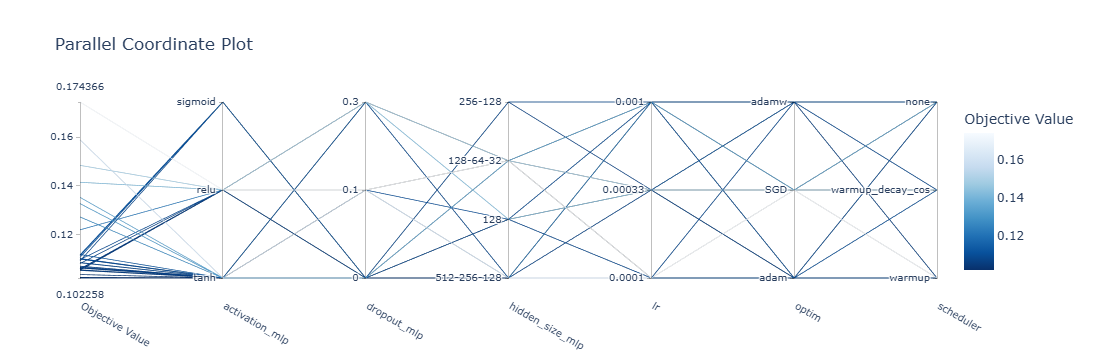

In [8]:
fig = plot_parallel_coordinate(study)
fig.show()

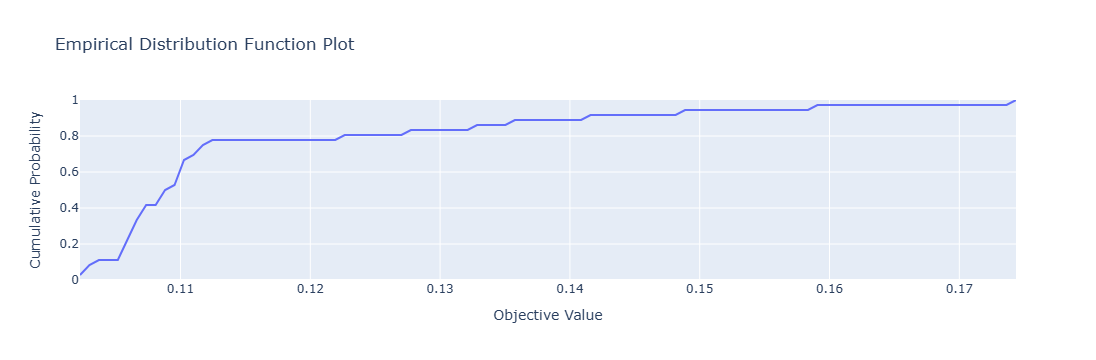

In [9]:
fig = plot_edf(study)
fig.show()

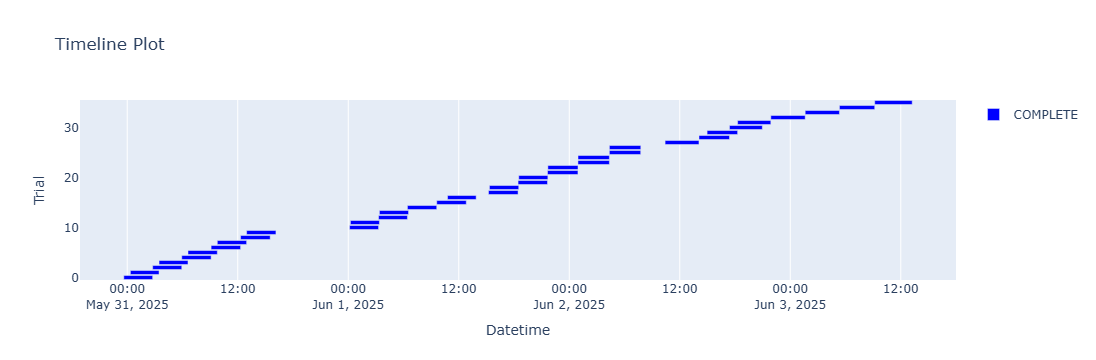

In [10]:
fig = plot_timeline(study)
fig.show()